<a href="https://colab.research.google.com/github/SiyiTang/LearningProcess/blob/main/GetData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 获取数据

查看Pandas的操作文档可以发现，第一个参数为股票代码，苹果公司的代码为"AAPL"，国内股市采用的输入方式“股票代码”+“对应股市”，上证股票在股票代码后面加上“.SS”，深圳股票在股票代码后面加上“.SZ”。DataReader可从多个金融网站获取到股票数据，如“Yahoo! Finance” 、“Google Finance”等，这里以Yahoo为例。第三、四个参数为股票数据的起始时间断。返回的数据格式为DataFrame。


In [ ]:
start = datetime.datetime(2017,1,1)#获取数据的时间段-起始时间
end = datetime.date.today()#获取数据的时间段-结束时间
stock = web.DataReader("600797.SS", "yahoo", start, end)#获取浙大网新2017年1月1日至今的股票数据

# 数据分析

1、打印DataFrame数据前5行和尾部倒数5行（浙大网新因重大事件停牌至1月6日开始复牌）

In [ ]:
print (stock.head(5))
print (stock.tail(5))

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2017-01-03  18.000000  18.000000  18.000000  18.000000         0.0  17.747011
2017-01-04  18.000000  18.000000  18.000000  18.000000         0.0  17.747011
2017-01-05  18.000000  18.000000  18.000000  18.000000         0.0  17.747011
2017-01-06  17.950001  16.200001  17.950001  16.200001  31539335.0  15.972312
2017-01-09  16.180000  14.900000  15.500000  15.420000  31874588.0  15.203275
            High   Low  Open  Close      Volume  Adj Close
Date                                                      
2021-03-29  6.93  6.76  6.88   6.81  11923666.0       6.81
2021-03-30  6.79  6.62  6.79   6.69  11568264.0       6.69
2021-03-31  6.84  6.68  6.70   6.77  10887085.0       6.77
2021-04-01  6.79  6.65  6.79   6.71   7387021.0       6.71
2021-04-02  6.80  6.67  6.71   6.71   7940543.0       6.71


In [ ]:
 isinstance(stock,pd.DataFrame)

True

2、打印DataFrame数据索引和列名，索引为时间序列，列信息为开盘价、最高价、最低价、收盘价、复权收盘价、成交量

In [ ]:
print (stock.index)
print (stock.columns)

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16',
               ...
               '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25',
               '2021-03-26', '2021-03-29', '2021-03-30', '2021-03-31',
               '2021-04-01', '2021-04-02'],
              dtype='datetime64[ns]', name='Date', length=1032, freq=None)
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


3、打印DataFrame数据形状，index长度为1032，columns数为6，即1032个交易日，6项股票数据

In [ ]:
print (stock.shape)

(1032, 6)


4、打印DataFrame数据查看数据是否有缺失，以及每列数据的类型

In [ ]:
print (stock.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1032 entries, 2017-01-03 to 2021-04-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1032 non-null   float64
 1   Low        1032 non-null   float64
 2   Open       1032 non-null   float64
 3   Close      1032 non-null   float64
 4   Volume     1032 non-null   float64
 5   Adj Close  1032 non-null   float64
dtypes: float64(6)
memory usage: 56.4 KB
None


5、打印DataFrame数据每组的统计情况，如最小值、最大值、均值、标准差等

In [21]:
print (stock.describe())

              High          Low  ...        Volume    Adj Close
count  1032.000000  1032.000000  ...  1.032000e+03  1032.000000
mean     10.499118    10.117432  ...  2.654594e+07    10.224927
std       2.452313     2.332334  ...  2.636632e+07     2.333166
min       5.990000     5.820000  ...  0.000000e+00     5.860000
25%       8.627500     8.407500  ...  1.075778e+07     8.471509
50%       9.965000     9.600000  ...  1.756887e+07     9.755732
75%      12.385000    12.010000  ...  3.343464e+07    11.992573
max      18.000000    18.000000  ...  2.950730e+08    17.747011

[8 rows x 6 columns]


6、DataFrame数据中增加涨/跌幅列，涨/跌=（当日Close-上一日Close）/上一日Close*100%

（1）添加一列change，存储当日股票价格与前一日收盘价格相比的涨跌数值，即当日Close价格与上一日Close的差值，1月3日这天无上一日数据，因此出现缺失

In [22]:
change = stock.Close.diff()
stock['Change'] = change
print (stock.head(5))

                 High        Low       Open  ...      Volume  Adj Close    Change
Date                                         ...                                 
2017-01-03  18.000000  18.000000  18.000000  ...         0.0  17.747011       NaN
2017-01-04  18.000000  18.000000  18.000000  ...         0.0  17.747011  0.000000
2017-01-05  18.000000  18.000000  18.000000  ...         0.0  17.747011  0.000000
2017-01-06  17.950001  16.200001  17.950001  ...  31539335.0  15.972312 -1.799999
2017-01-09  16.180000  14.900000  15.500000  ...  31874588.0  15.203275 -0.780001

[5 rows x 7 columns]


（2）对缺失的数据用涨跌值的均值就地替代NaN。

In [23]:
change.fillna(change.mean(),inplace=True)

（3）计算涨跌幅度有两种方法，pct_change()算法的思想即是第二项开始向前做减法后再除以第一项，计算得到涨跌幅序列。

In [25]:
stock['pct_change'] = (stock['Change'] /stock['Close'].shift(1))#
stock['pct_change1'] = stock.Close.pct_change()


7、DataFrame数据中增加跳空缺口数值序列，这里定义的缺口为上涨趋势和下跌趋势中的突破缺口，上涨趋势中今天的最低价高于昨天收盘价为向上跳空，下跌趋势中昨天收盘价高于今天最高价为向下跳空。遍历每个交易日后将符合跳空缺口条件的交易日增加缺口数值。



In [31]:
jump_pd = pd.DataFrame()
for kl_index in np.arange(1, stock.shape[0]):
  today = stock.iloc[kl_index]
  yesday = stock.iloc[kl_index-1] #iloc为index值定位
  today['preCloae'] = yesday.Close   
  if today['pct_change'] > 0 and (today.Low-today['preCloae']) > 0:
      today['jump_power'] = (today.Low-today['preCloae'])
  elif today['pct_change'] < 0 and (today.High-today['preCloae']) < 0:
      today['jump_power'] = (today.High-today['preCloae'])
  jump_pd = jump_pd.append(today)        
stock['jump_power'] = jump_pd['jump_power']
print (stock.loc["2017-04-26":"2017-06-15"])#默认打印全部列


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-p

             High    Low   Open  ...  pct_change  pct_change1  jump_power
Date                             ...                                     
2017-04-26  12.35  12.09  12.16  ...    0.001637     0.001637         NaN
2017-04-27  12.18  11.29  12.18  ...   -0.019608    -0.019608   -0.059999
2017-04-28  12.09  11.83  11.97  ...    0.000833     0.000833         NaN
2017-05-02  12.68  12.22  12.30  ...    0.037469     0.037469    0.210000
2017-05-03  12.81  12.36  12.38  ...    0.012038     0.012038         NaN
2017-05-04  12.61  12.61  12.61  ...    0.000000     0.000000         NaN
2017-05-05  12.61  12.61  12.61  ...    0.000000     0.000000         NaN
2017-05-08  12.61  12.61  12.61  ...    0.000000     0.000000         NaN
2017-05-09  12.61  12.61  12.61  ...    0.000000     0.000000         NaN
2017-05-10  13.87  13.45  13.78  ...    0.099921     0.099921    0.840000
2017-05-11  14.50  12.91  14.50  ...   -0.013699    -0.013699         NaN
2017-05-12  13.41  12.87  13.03  ...  

8、DataFrame数据保留两位小数显示

In [33]:
format = lambda x: '%.2f' % x
stock = stock.applymap(format)
print (stock.loc["2017-04-26":"2017-06-15"])#默认打印全部列 loc为index名或colunm定位

             High    Low   Open  Close  ... Change pct_change pct_change1 jump_power
Date                                    ...                                         
2017-04-26  12.35  12.09  12.16  12.24  ...   0.02       0.00        0.00        nan
2017-04-27  12.18  11.29  12.18  12.00  ...  -0.24      -0.02       -0.02      -0.06
2017-04-28  12.09  11.83  11.97  12.01  ...   0.01       0.00        0.00        nan
2017-05-02  12.68  12.22  12.30  12.46  ...   0.45       0.04        0.04       0.21
2017-05-03  12.81  12.36  12.38  12.61  ...   0.15       0.01        0.01        nan
2017-05-04  12.61  12.61  12.61  12.61  ...   0.00       0.00        0.00        nan
2017-05-05  12.61  12.61  12.61  12.61  ...   0.00       0.00        0.00        nan
2017-05-08  12.61  12.61  12.61  12.61  ...   0.00       0.00        0.00        nan
2017-05-09  12.61  12.61  12.61  12.61  ...   0.00       0.00        0.00        nan
2017-05-10  13.87  13.45  13.78  13.87  ...   1.26       0.10    

# 股价信息的可视化

Matplotlib是使用Python进行绘图里非常方便的库。这次 plot使用的数据是 Adj Close栏的数据。这是所说的已调整收盘价。

如下仅仅需要两行写就可以简单的将股价作为时间序列数据画出来。

完整实例如下。

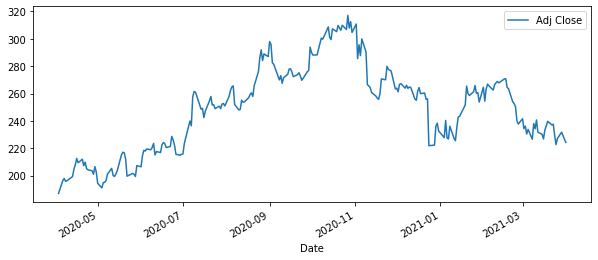

In [39]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
 
import matplotlib.pyplot as plt
import pandas_datareader.data as wb
import datetime
 
end = datetime.date.today()
start = datetime.datetime(end.year - 1, end.month, end.day)
alibaba = web.DataReader('BABA', 'yahoo', start, end)

alibaba['Adj Close'].plot(legend=True, figsize=(10,4))
plt.show()

